In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import warnings


from statsmodels.tsa.stattools import acf
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import bartlett
from scipy.stats import levene
from sqlalchemy import create_engine
from sklearn import linear_model

warnings.filterwarnings('ignore')

## 1İNCİ SORU:

In [65]:
hava=pd.read_csv(".\\WeatherHistory.csv")

In [66]:
hava.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [90]:
hava.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [68]:
scklik=hava["Temperature (C)"]
dgsken=hava[["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Pressure (millibars)"]]

In [69]:
degiskenler=sm.add_constant(dgsken)
sicaklik=sm.OLS(scklik, degiskenler).fit()
sicaklik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:21:23   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MODELİMİZ
#### Sıcaklık= 37.9264 - 32.4962 [Nem] - 0.2014 [Rüzgâr Hızı] + 0.0040 [Rüzgâr] - 0.0007 [Basınç]

### GAUSS - MARKOV KURALLARININ DEĞERLENDİRİLMESİ

#### a. Katsayılarda Doğrusallık

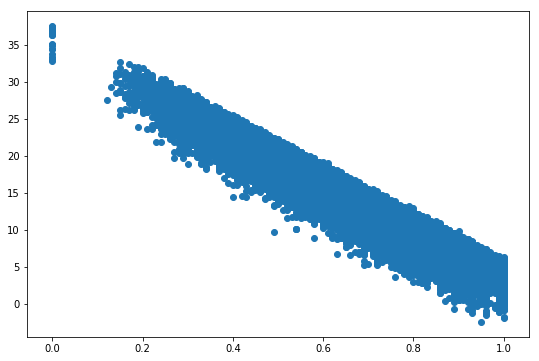

In [76]:
hv_thmn=linear_model.LinearRegression()
hv_thmn.fit(dgsken, scklik)

hava_tahmin=hv_thmn.predict(dgsken)

plt.figure(figsize=(9,6))
plt.scatter(hava["Humidity"], hava_tahmin)
plt.show()

###### Katsayılarımız doğrusaldır.

####  b. Hata Terimi Ortalaması

In [79]:
tahmin_hata=scklik-hava_tahmin

print("Hata Ortalaması: {:.18f}".format(tahmin_hata.mean()))

Hata Ortalaması: 0.000000000000001474


###### Hata ortalaması, sıfırdır.

#### c. Eş Varyanlılık (Homoscedasticity)

In [81]:
test_bartlett=bartlett(hava_tahmin, tahmin_hata)
test_levene=levene(hava_tahmin, tahmin_hata)

print("Bartlett sonucu: {}\np değeri: {}\n".format(test_bartlett[0], test_bartlett[1]))
print("Levene sonucu: {}\np değeri: {}\n".format(test_levene[0], test_levene[1]))

Bartlett sonucu: 2464.8446568676018
p değeri: 0.0

Levene sonucu: 2321.2401008575803
p değeri: 0.0



###### Her iki testte de p değeri sıfır çıktı. Bu durumda, modelimiz bu kuralı karşılamaktadır.

#### ç. Düşük Çoklu Doğrusallık

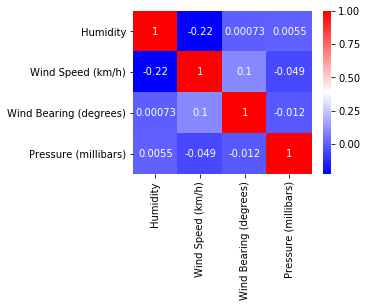

In [82]:
dgsken_corr=dgsken.corr()

plt.figure(figsize=(4,3))
sns.heatmap(dgsken_corr, annot=True, cmap="bwr")
plt.show()

###### En fazla korelasyon, rüzgâr hızı ile nem arasındadır. Ancak, bu değer de düşük sayılmaktadır.

#### d. Hata Terimlerinin İlişkisizkiği

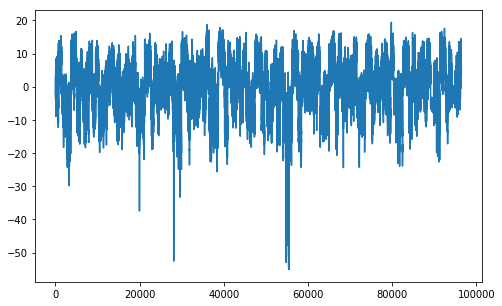

In [85]:
plt.figure(figsize=(8,5))
plt.plot(tahmin_hata)
plt.show()

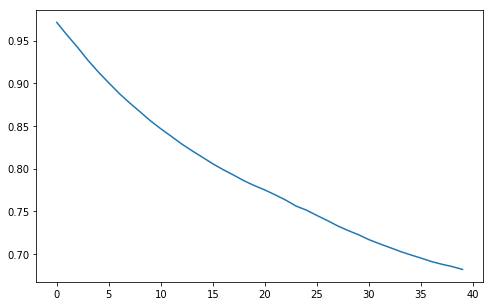

In [86]:
acf_dt=acf(tahmin_hata)

plt.figure(figsize=(8,5))
plt.plot(acf_dt[1:])
plt.show()

###### Otokorelasyon tablosuna baktığımızda, rastgelelik göremiyoruz. Değerler, birbiriyle ilişkili durumdadır.
Otokorelasyonun nedenleri şu şekilde sıralanabilir:
- Bazı açıklayıcı değişkenlerin modele alınmaması
- Modelin matematiksel biçiminin yanlış seçilmesi.
- Açıklanan değişkende ölçme hatası olması
- Verilerin işlenmesi.
- Hata teriminin yanlış belirlenmesi.

Buradaki en muhtemel sebep, modelin matematiksel biçiminin yanlış seçilmesi veya bazı açıklayıcı değişkenlerin eklenmemesi olabilir. Modele eklenmemiş olan değişkenler "Precip Type", "Visibility" ve "Loud Cover" olarak görülmektedir.

İlk ikisi, diğer değişkenlerden etkilenmektedir. 

"Loud Cover" (muhtemelen "Cloud Cover" [Bulut Örtüsü] kastedilmiş) modele eklenerek işlemler tekrar edilebilir.

#### e. Özelliklerin Hatalarla Korelasyonu

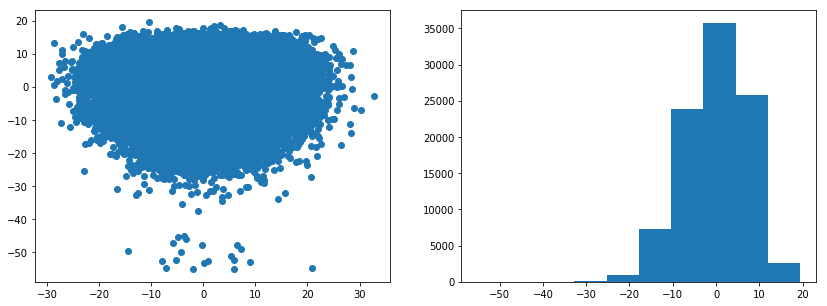

In [88]:
normal_random_sayilar=np.random.normal(tahmin_hata.mean(), tahmin_hata.std(), len(tahmin_hata))

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(normal_random_sayilar, tahmin_hata)

plt.subplot(1,2,2)
plt.hist(tahmin_hata)

plt.show()

In [87]:
jb_tst=jarque_bera(tahmin_hata)
nrm_tst=normaltest(tahmin_hata)

print("Jarque-Bera sonucu: {}\np değeri: {}\n".format(jb_tst[0], jb_tst[1]))
print("Normal Test sonucu: {}\np değeri: {}\n".format(nrm_tst[0], nrm_tst[1]))

Jarque-Bera sonucu: 3793.2967352523283
p değeri: 0.0

Normal Test sonucu: 3375.432307699559
p değeri: 0.0



###### Tüm test sonuçları, hataların normal dağılmadığını gösteriyor.

## 2NCİ SORU:

In [2]:
knt=pd.read_csv("C:\\Users\\Gunesim\\Desktop\\Ödevler\\konut_train.csv", encoding="utf8", engine="python")

In [4]:
kategorik=[i for i in knt.columns if knt[i].dtype=="object"]
surekli=[i for i in knt.columns if (knt[i].dtype=="int64" or knt[i].dtype=="float64")]

In [5]:
konut=knt
for i in kategorik:
    konut[i]=knt[i].fillna("Null")
for i in surekli:
    konut[i]=knt[i].fillna(0)

In [22]:
snc=konut["SalePrice"]
bgmsz=konut[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea"]]

In [25]:
bagimsiz=sm.add_constant(bgmsz)
sonuc=sm.OLS(snc, bagimsiz).fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:27:46   Log-Likelihood:                -17550.
No. Observations:                1460   AIC:                         3.511e+04
Df Residuals:                    1455   BIC:                         3.514e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.09e+05   5042.479    -21.613      0.000   -1.19e+05   -9.91e+04
OverallQual  2.846e+04   1028.503     27.671      0.000    2.64e+04    3.05e+04
TotalBsmtSF    25.7604      4.453      5.784      0.000      17.025      34.496
1stFlrSF       16.6766      5.181      3.219      0.001       6.513      26.840
GrLivArea      45.9858      2.761     16.654      0.000      40.569      51.402
==============================================================================
Omnibus:                      511.104   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43306.711
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                      29.646   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 1. Katsayılarda Modelin Doğrusallığı

In [31]:
thmn=linear_model.LinearRegression()
thmn.fit(bgmsz, snc)

tahmin=thmn.predict(bgmsz)

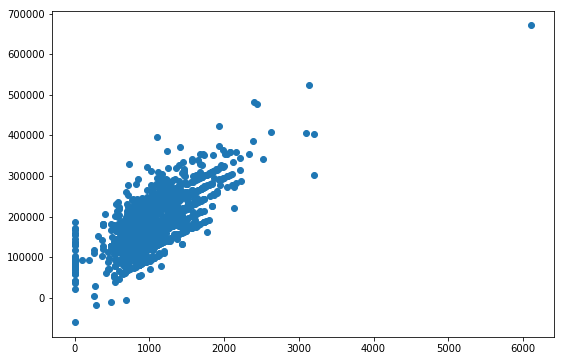

In [33]:
plt.figure(figsize=(9,6))
plt.scatter(konut["TotalBsmtSF"], tahmin)
plt.show()

Katsayılar açısından modelimiz doğrusaldır.

#### 2. Hata Terimi Ortalaması Sıfır Olmalıdır.

In [41]:
hatalar=snc-tahmin
print("Hata Terimi Ortalaması: {:.15f}".format(hatalar.mean()))

Hata Terimi Ortalaması: 0.000000000037197


Hata ortalamamız sıfırdır.

#### 3. Homoscedasticity

In [47]:
bartlett_testi=bartlett(tahmin, hatalar)
levene_testi=levene(tahmin, hatalar)

print("Bartlett sonucu: {}\np değeri: {}\n".format(bartlett_testi[0], bartlett_testi[1]))
print("Levene sonucu: {}\np değeri: {}\n".format(levene_testi[0], levene_testi[1]))

Bartlett sonucu: 396.30004053672116
p değeri: 3.51867023484475e-88

Levene sonucu: 383.42334704648965
p değeri: 2.5710119489338337e-80



P değerleri 0.05'ten küçüktür.

#### 4. Düşük çoklu doğrusallık

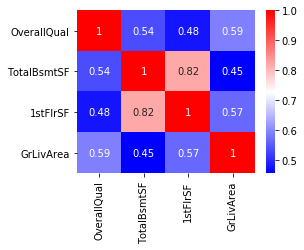

In [52]:
bgmsz_corr=bgmsz.corr()

plt.figure(figsize=(4,3))
sns.heatmap(bgmsz_corr, annot=True, cmap="bwr")
plt.show()

"TotalBsmtSF" ile "1stFlrSF" arasındaki yüksek korelasyonu gözden kaçırmışım. Modelim, bu açıdan başarısız.

#### 5. Hata Terimleri Birbiriyle İlişkisiz Olmalı

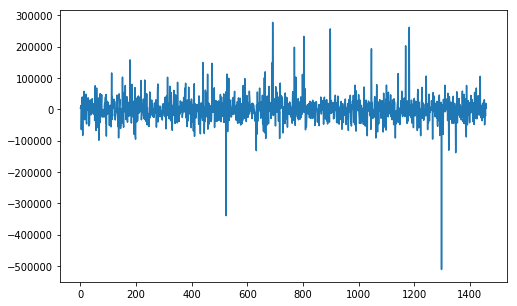

In [53]:
plt.figure(figsize=(8,5))
plt.plot(hatalar)
plt.show()

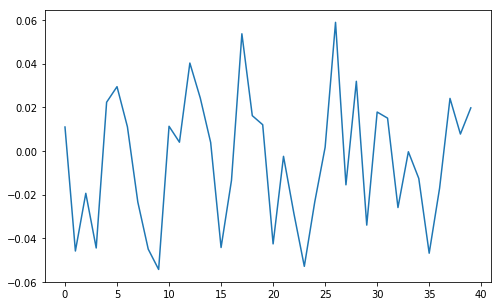

In [54]:
acf_data=acf(hatalar)

plt.figure(figsize=(8,5))
plt.plot(acf_data[1:])
plt.show()

Herhangi bir trend görülmemektedir. Ayrıca, otokorelasyon açısından bakıldığında da değerler güven aralığı içerisindedir. Hatalar, birbiriyle ilişkisizdir.

#### 6. Özellikler Hatalarla Korele olmamalı

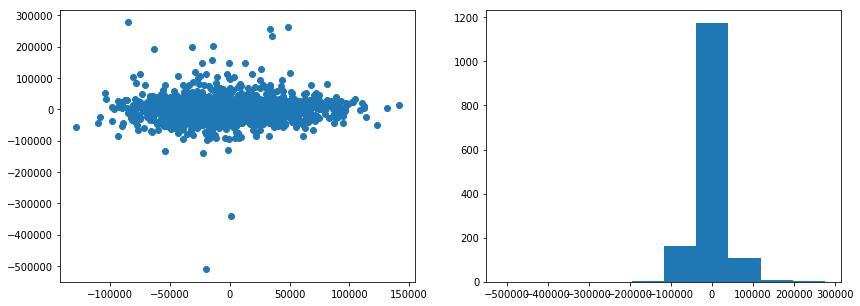

In [57]:
normal_random_sayilar=np.random.normal(hatalar.mean(), hatalar.std(), len(hatalar))

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(normal_random_sayilar, hatalar)

plt.subplot(1,2,2)
plt.hist(hatalar)

plt.show()

In [58]:
jb_test=jarque_bera(hatalar)
nrm_test=normaltest(hatalar)

print("Jarque-Bera sonucu: {}\np değeri: {}\n".format(jb_test[0], jb_test[1]))
print("Normal Test sonucu: {}\np değeri: {}\n".format(nrm_test[0], nrm_test[1]))

Jarque-Bera sonucu: 43306.710669665605
p değeri: 0.0

Normal Test sonucu: 511.1040709561144
p değeri: 1.0355263459697201e-111



Bütün testlerin sonuçları, hatalarımızın normal dağılmadığını göstermektedir.

#### Kurduğumuz model, düşük çoklu doğrusallık dışında tüm testlerden geçmiştir.